
# Projet 2

In [1]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [2]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [3]:
geo['CP Ville'] = geo['Code Postal'] + ' ' + geo['Commune']

In [4]:
# fonction recherche de ville
def ville(lat, long):
    # recherche des lat et long les plus proches dans la base de données
    ville_lat, ville_long, ind = geo['Latitude'][0], geo['Longitude'][0], 0
    
    for i in range(1, len(geo['Latitude'])):
        if np.abs(ville_lat - lat) > np.abs(geo['Latitude'][i] - lat) and np.abs(ville_long - long) > np.abs(geo['Longitude'][i] - long):
            ville_lat, ville_long, ind = geo['Latitude'][i], geo['Longitude'][i], i
            #print(ville_lat)
            #print(ville_long)
            #print(geo['CP Ville'][ind])
            
    return ville_lat, ville_long, geo['CP Ville'][ind]

In [5]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [6]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

print('lat :', lat)
print('long :', long)

ville(lat, long)

lat : 46.76860963770232
long : 5.341764749037324


(46.7696786287, 5.34727924927, '71330 BOSJEAN')

In [7]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

(48.7146765876, 2.22881488083, '91120 PALAISEAU')

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [8]:
import json

In [113]:
geo_shape_json = geo['geo_shape'].to_json()#orient='records')
geo_parsed = json.loads(geo_shape_json)

for index in geo_parsed:
    geo_parsed[index] = json.loads(geo_parsed[index])

geo_parsed

{'01001': {'type': 'Polygon',
  'coordinates': [[[4.92627342692396, 46.1200517234555],
    [4.92199538031264, 46.12069170563269],
    [4.921996260482057, 46.12663667307488],
    [4.90936269187648, 46.129164756530656],
    [4.916016986429157, 46.14461766984426],
    [4.903080786126749, 46.157977074275074],
    [4.904571300671208, 46.16096059498421],
    [4.910603091203733, 46.180432597608316],
    [4.914119126867876, 46.18271538441311],
    [4.932895432675545, 46.18304616431434],
    [4.938729478686701, 46.17383114520867],
    [4.933038591703602, 46.16429901579509],
    [4.958286230120842, 46.153246666893935],
    [4.943330383388636, 46.145964148557894],
    [4.939154593056283, 46.12938048470421],
    [4.931056072485923, 46.12087123131487],
    [4.92627342692396, 46.1200517234555]]]},
 '01002': {'type': 'Polygon',
  'coordinates': [[[5.430089291292173, 45.98275997279625],
    [5.424810046644151, 45.9864227628877],
    [5.424325892463126, 45.99684772917092],
    [5.404368934888941, 46.00

In [160]:
# obtenir tous les types différents

s = set()

for index in geo_parsed:
    s.add(list(geo_parsed[index].values())[0])
    
s

{'MultiPolygon', 'Polygon'}

In [174]:
# Compter le nombre d'occurences des différents types

type_dict = {
    'Polygon' : 0,
    'MultiPolygon' : 0
}

for index in geo_parsed:
    if list(geo_parsed[index].values())[0] == 'Polygon':
        type_dict['Polygon'] +=1
    else:
        type_dict['MultiPolygon'] +=1

type_dict

{'Polygon': 36670, 'MultiPolygon': 72}

In [178]:
# Obtenir toutes les longueurs des listes des coordonnées

s_coor = set()

for index in geo_parsed:
    s_coor.add(len(list(geo_parsed[index].values())[1]))
    
s_coor

{1, 2, 3, 4}

In [203]:
# Compter le nombre d'occurences des longueurs des listes des coordonnées

coordinates_dict = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0
}

for index in geo_parsed:
    if len(list(geo_parsed[index].values())[1]) == 1:
        coordinates_dict[1] +=1
    elif len(list(geo_parsed[index].values())[1]) == 2:
        coordinates_dict[2] +=1
    elif len(list(geo_parsed[index].values())[1]) == 3:
        coordinates_dict[3] +=1
    else:
        coordinates_dict[4] +=1

coordinates_dict

{1: 36660, 2: 80, 3: 1, 4: 1}

In [231]:
# Détermination des 2 communes les plus complexes géométriquements

for index in geo_parsed:
    
    if len(list(geo_parsed[index].values())[1]) == 4:
        print('La commune la plus complexe géométriquement est :', geo[geo.index == index]['Commune'].iloc[0])
        
    elif len(list(geo_parsed[index].values())[1]) == 3:
        print('La seconde commune la plus complexe géométriquement est :', geo[geo.index == index]['Commune'].iloc[0], '\n')


La seconde commune la plus complexe géométriquement est : VAL-DE-REUIL 

La commune la plus complexe géométriquement est : HYERES


In [238]:
villes_poly2 = {}

for index in geo_parsed:
    if (list(geo_parsed[index].values())[0] == 'Polygon') & (len(list(geo_parsed[index].values())[1]) == 2):
        villes_poly2[index] = geo[geo.index == index]['Commune'].iloc[0]

print('Les communes qui ont une forme de polygone et une lise de coordonées de longueur 2 sont :\n', villes_poly2)
print('\nElles sont au nombre de : ', len(villes_poly2))

Les communes qui ont une forme de polygone et une lise de coordonées de longueur 2 sont :
 {'02232': 'COYOLLES', '05052': 'EYGLIERS', '09042': 'LA BASTIDE-DE-SEROU', '22209': 'PLOUBALAY', '2A272': 'SARTENE', '2B049': 'CALENZANA', '48080': 'LANGOGNE', '67486': 'SUNDHOUSE', '68078': 'EGUISHEIM', '71028': 'BEAUVERNOIS'}

Elles sont au nombre de :  10


In [289]:
from shapely import geometry
import matplotlib.pyplot as plt

In [290]:
coord_points_1 = []
coord_points_2 = []

poly2_dict = {}
for index in villes_poly2.keys():
    poly2_dict[index] = {}

for index in villes_poly2.keys():
    coord_points_1 = list(geo_parsed[index].values())[1][0]
    coord_points_2 = list(geo_parsed[index].values())[1][1]
    
    poly2_dict[index]['Commune'] = geo[geo.index == index]['Commune'].iloc[0]
    poly2_dict[index]['polygone1'] = geometry.Polygon(point for point in coord_points_1)
    poly2_dict[index]['polygone2'] = geometry.Polygon(point for point in coord_points_2)


Vérification pour la commune : COYOLLES


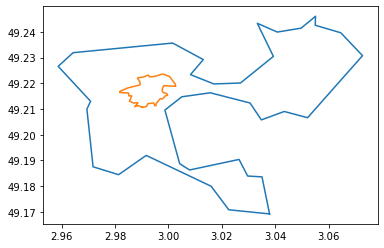

In [330]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[0]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[0]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[0]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : EYGLIERS


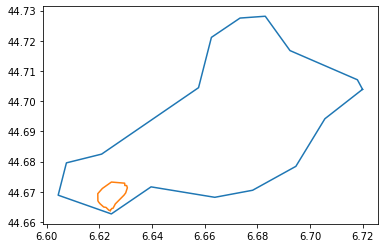

In [331]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[1]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[1]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[1]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : LA BASTIDE-DE-SEROU


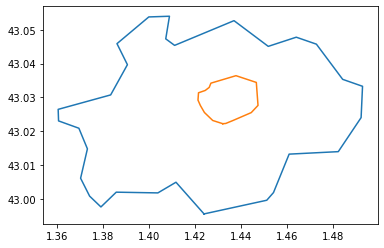

In [332]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[2]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[2]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[2]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : PLOUBALAY


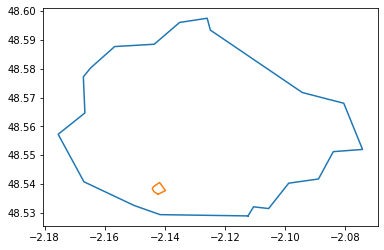

In [329]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[3]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[3]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[3]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : SARTENE


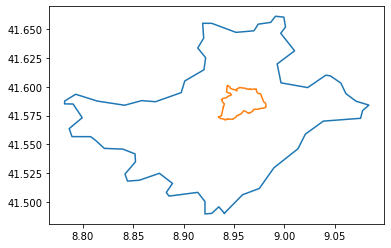

In [342]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[4]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[4]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[4]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : CALENZANA


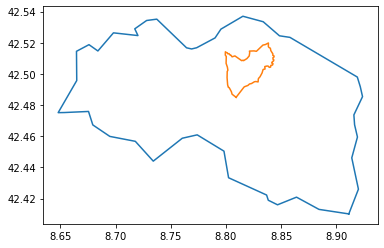

In [343]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[5]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[5]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[5]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : LANGOGNE


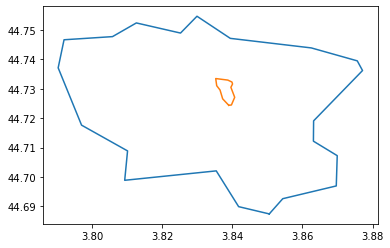

In [344]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[6]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[6]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[6]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : SUNDHOUSE


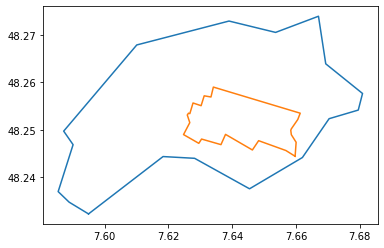

In [345]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[7]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[7]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[7]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : EGUISHEIM


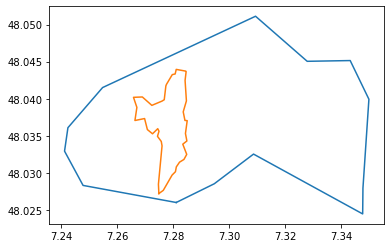

In [346]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[8]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[8]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[8]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

Vérification pour la commune : BEAUVERNOIS


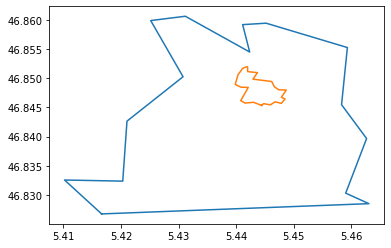

In [347]:
print('Vérification pour la commune :',poly2_dict[list(poly2_dict.keys())[9]]['Commune'])

r1 = poly2_dict[list(poly2_dict.keys())[9]]['polygone1']
r2 = poly2_dict[list(poly2_dict.keys())[9]]['polygone2']

x1, y1 = r1.exterior.xy
x2, y2 = r2.exterior.xy

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()